In [42]:
#Auto MPG 데이터셋 이용하기


import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 셋 다운 (그대로 실행 하면 됨)
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

# pandas를 이용해 데이터 읽기 (여기까지 그대로 실행해서 출력해주세요)
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()
dataset.shape

(398, 8)

In [43]:
# 데이터 정제
# 문제 1 - 데이터셋에 누락된 데이터 삭제해주세요
dataset.isna().dropna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [34]:
# 문제 2 - Origin 열을 삭제 후 Origin 값을 바탕으로 USA, Europe, Japan 컬럼을 만들어주세요

# USA의 Origin 값 = 1
# Europe의 Origin 값 = 2
# Japan의 Origin 값 = 3

# 데이터셋에서 Origin이라는 행렬을 제거하면서 제거한 행을 가져오기
origin = dataset.pop("Origin")

dataset['USA'] = (origin == 1)*1.0
## 다른 방법 dataset['Europe'] = np.where(origin == 2, 1.0, 0.0)
# 다음조건이 맞으면 1.0 / 다르면 0.0

dataset['Europe'] = (origin == 2)*1.0
# 다른 방법 dataset['Europe'] = np.where(origin == 2, 1.0, 0.0)
# 다음조건이 맞으면 1.0 / 다르면 0.0

dataset['Japan'] = (origin == 3)*1.0
# 다른 방법 dataset['Japan'] = np.where(origin == 3, 1.0, 0.0)
# 다음조건이 맞으면 1.0 / 다르면 0.0

dataset.tail()


C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

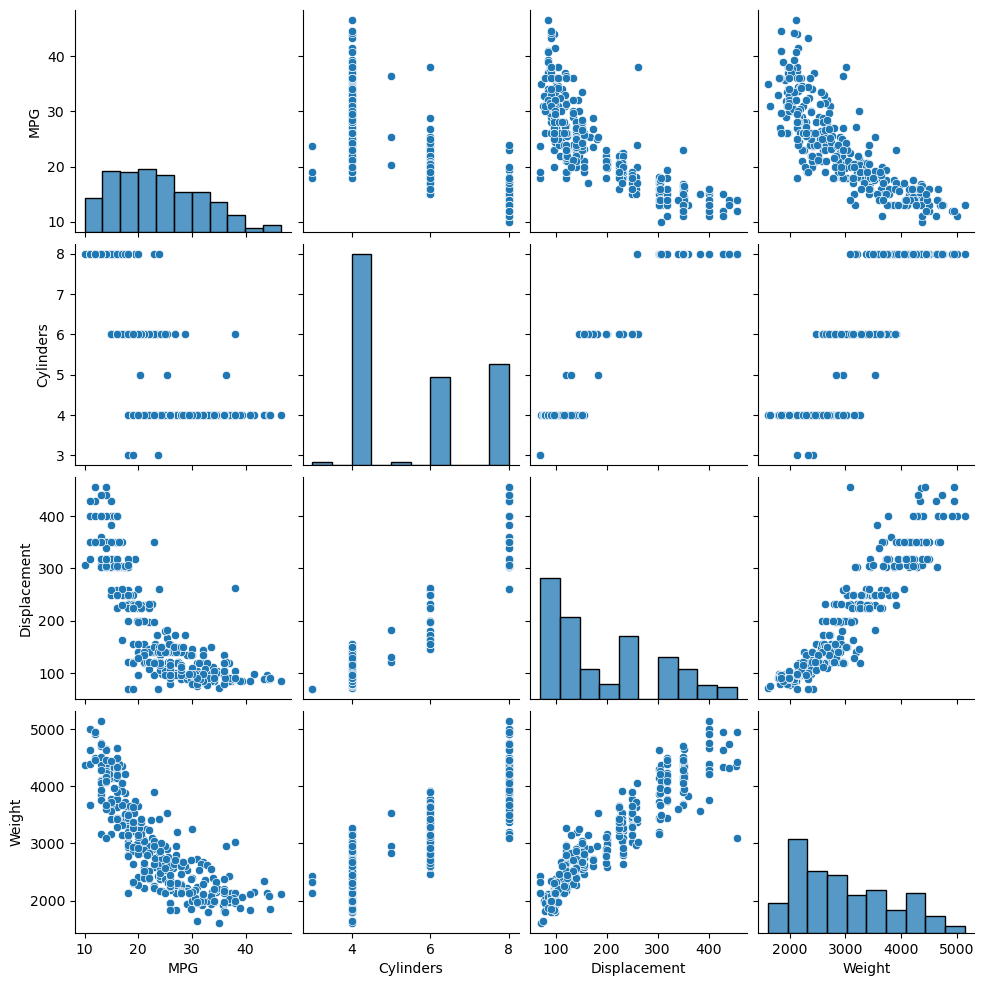

In [19]:
# 문제 3 - 산점도 행렬(pairplot) 생성
# MPG, Cylinders, Displacement, Weight 열만 선택해 산점도 생성
# "커널 밀도 추정 그래프" 그리세요

train_dataset = dataset.sample(frac=0.8,random_state=0)
sns.pairplot(train_dataset[["MPG","Cylinders","Displacement","Weight"]], diag_kind="auto")

In [25]:
# 문제 4 - 데이터 조사

# 데이터 통계정보
train_stats = train_dataset.describe()

#데이터 전치
train_stats = train_stats.transpose() # 보기 쉽게 데이터의 행 열 바꿔주세요
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
Cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.000,92.00,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.000,1.00,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.000,0.00,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.000,0.00,0.00,1.0
